In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lifelines import datasets

data = datasets.load_larynx()

In [2]:
data['group'] = data['age']
data['group'] = data['group'].apply(lambda x: 'younger' if x<65 else 'older')
data.head()

,time,age,death,Stage_II,Stage_III,Stage_IV,group
0,0.6,77,1,0,0,0,older
1,1.3,53,1,0,0,0,younger
2,2.4,45,1,0,0,0,younger
3,2.5,57,0,0,0,0,younger
4,3.2,58,1,0,0,0,younger


In [3]:
from lifelines import ExponentialFitter
exf = ExponentialFitter()
exf.fit(data.time, data.death)

# this print the first 5 elements of the survival function
exf.survival_function_.head()

,Exponential_estimate
0.100000,0.986853
0.219101,0.971419
0.338202,0.956227
0.457303,0.941273
0.576404,0.926553


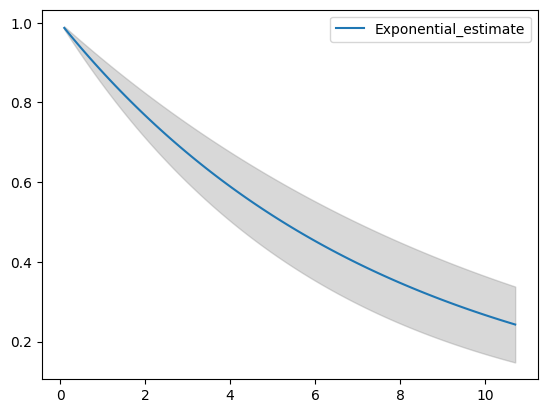

In [4]:
# Larynx survival function using Exponential distribution

fig, ax = plt.subplots(1)

exf.survival_function_.plot(ax=ax)

ci = exf.confidence_interval_survival_function_

index = ci.index

ci_low, ci_high = ci.values[:, 0], ci.values[:, 1]

ax.fill_between(index, ci_low, ci_high, color='gray', alpha=0.3)

In [5]:
#  similar studies between the younger group 
#(less than 65 years old) and the older group (from 65 years old)

data1 = data[data['group'] == 'younger']
exf1 = ExponentialFitter()
exf1.fit(data1.time, data1.death)

data2 = data[data['group'] == 'older']
exf2= ExponentialFitter()
exf2.fit(data2.time, data2.death)

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 48 total observations, 18 right-censored observations>

<AxesSubplot:>

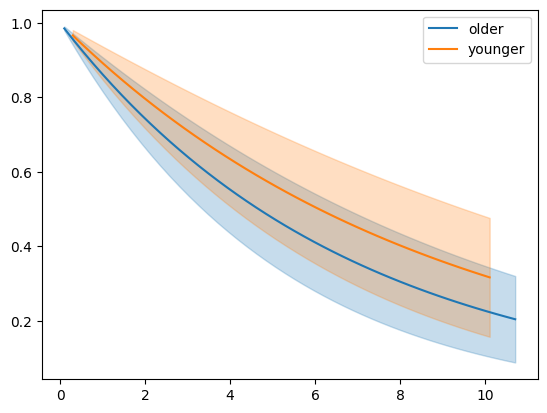

In [6]:
#Larynx survival functions for older and younger groups 

exf1 = ExponentialFitter().fit(data1.time, data1.death, label='younger')
exf2 = ExponentialFitter().fit(data2.time, data2.death, label='older')
exf2.plot_survival_function()
exf1.plot_survival_function()

/var/folders/x7/_cy_rqsj03111rr15vx6_jh80000gn/T/ipykernel_30888/771102271.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data1 = data.loc[set.intersection(set(np.where(data['Stage_II'] ==0)[0]),


<AxesSubplot:>

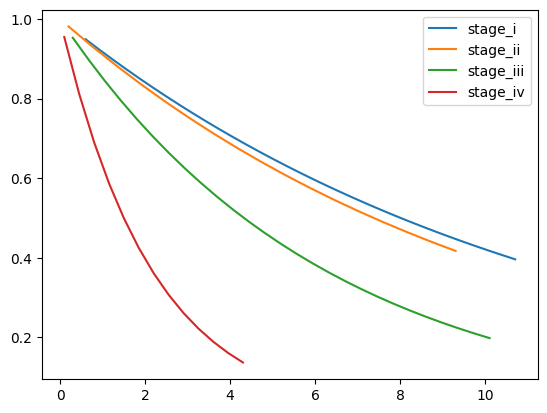

In [7]:
#Larynx survival functions based on stage 

data2  = data.loc[np.where(data['Stage_II'] == 1)]
data3  = data.loc[np.where(data['Stage_III'] == 1)]
data4  = data.loc[np.where(data['Stage_IV'] == 1)]
data1 = data.loc[set.intersection(set(np.where(data['Stage_II'] ==0)[0]), 
                                  set(np.where(data['Stage_III'] ==0)[0]), 
                                  set(np.where(data['Stage_IV'] ==0)[0]))]

exf1 = ExponentialFitter().fit(data1.time, data1.death, label='stage_i')
exf2 = ExponentialFitter().fit(data2.time, data2.death, label='stage_ii')
exf3 = ExponentialFitter().fit(data3.time, data3.death, label='stage_iii')
exf4= ExponentialFitter().fit(data4.time, data4.death, label='stage_iv')
exf1.plot_survival_function(ci_show=False)
exf2.plot_survival_function(ci_show=False)
exf3.plot_survival_function(ci_show=False)
exf4.plot_survival_function(ci_show=False)